> ## EDA CASE STUDY - Gramener Loan Risk
>Submitted By       : ***Srinivasan. G, Naveed.J, Denny.J and Kumar.A***<br>
>Date of Submission : ***30-December-2018***<br>
>Batch              : ***September - 2018***<br>

### Business Context
>    The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.When the company receives a loan application, the company has to make a decision for loan approval or reject the application based on the applicant’s profile.<br><br>
Once the application is accepted and the loan has to be sanctioned. The risk associated with that is either borrower will repay the amount in installments (both principal and interst) completely or can default leading to credit loss for the company.

### Problem Statement
>    Like most other lending companies, lending loans to 'risky' applicants is the largest source for the financial loss or credit loss. If the borrower refuses or fails to repay the loan are considered as 'Charged Off' and the repayment amount is the credit loss to the company.<br>

>    If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br>

>   Also, company wants to understand the driving factors (or driver variables) behind loan default. i.e., the variables which strong indicators of default.<br>

### Dataset Information provided
>   The loan dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011. It contains information about customer and loan attributes of the previously approved loan applicants.<br>

### Objective of Case Study
>   The aim is to identify patterns and driving variables which indicate if a loan application is likely to default, which may be used for taking decisions such as deny loans,reducing amount of loan, lending (to risky applicants) at higher interest rate etc.,

### Methodologies & Deliverables
>   Execute EDA on the dataset provided and risk analysis to gain understanding on lending patterns and driving variables.<br>
> 1. Data cleansing on the dataset by removing unknown and unwanted data 
> 2. Perform univariate and bivariate analysis etc., on the variables to identify patterns
> 3. Determine the driving factors (driving variables) which have strong influence lending to 'risky applicants'.
> 4. Present analysis results in graphical representation in python jupyter notebook
> 5. Present finding through visualisations using Tableau and presentation in pdf document.

### Import Libraries for analysis<br>

In [2]:
# Import All necessary Libraries numpy,pandas,matplotlib and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Setup necessary Jupyter notebook options<br>

In [3]:
# Set up jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# If necessary use the set options of the display . If not required. disable 
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.max_rows = 999

In [5]:
#Change the float format for display in notebook
pd.options.display.float_format = '{:,.2f}'.format

## 1. Read the Loan data <br>

In [6]:
## Read the Uber Request Data.csv file 
loan = pd.read_csv("./Data/loan.csv",low_memory=False) 

FileNotFoundError: File b'./Data/loan.csv' does not exist

## 2. Data Cleansing <br>

### 2.1 Verify the data and attributes<br>

In [7]:
# Verify the shape of the data frame.
loan.shape

NameError: name 'loan' is not defined

In [8]:
# check column names, data types and other info.
pd.set_option('max_info_columns', 115)
loan.info()
pd.reset_option('max_info_columns')

NameError: name 'loan' is not defined

In [9]:
# make sure that number of duplicate rows are zero (Key column duplicated or not)
sum(loan.duplicated(subset = "id")) == 0

NameError: name 'loan' is not defined

In [10]:
## Verify null null values in the data frame.
loan.isnull().sum()

NameError: name 'loan' is not defined

#### **Observations**
> 1. As per section 2.1, there are total of `39717 rows and 111 columns` in the data frame.
> 2.  There are many columns where all the rows of the columns are NULL

#### **Inferences & Conclusions**
> 1. Need to remove all the columns which are NULL

### 2.2 Remove Columns for which all rows are NULL <br>

In [11]:
# Following are the list of columns which has all the rows having NULL
null_columns=loan.columns[loan.isnull().all()]
loan[null_columns].isnull().sum().count()

NameError: name 'loan' is not defined

In [12]:
# List the null columns where all rows are NULL
loan[null_columns].isnull().sum()

NameError: name 'loan' is not defined

In [13]:
# The columns with all rows having NULL are not useful for our analysis 
# and hence it can be dropped safely.
# There are total of 54 columns with all rows NULL out of 111 columns.

# Drop all columns which have all Null values
loan.dropna(axis=1,how='all',inplace=True)
loan.shape

NameError: name 'loan' is not defined

In [14]:
## Verify the NULL percentages attributes in the loan data frame. 
round(100*(loan.isnull().sum()/len(loan.index)), 2)

NameError: name 'loan' is not defined

#### **Observations**
> 1. As per Section 2.2, there are total of `54 columns out of 111` has all the rows NaN in the data frame.
> 2. There will be 39717 rows and 57 columns remaining in the data frame after clean up.
#### **Conclusions** 
> 1. There are numerous non-essential arrtibutes or columns with predominantly NA or 0 values. The columns which are not useful for EDA required to be removed from the data frame.<br><br>
> 2. Further analysis on each of the remaining columns to understand the key which are the driving factor for our risk analysis.<br><br>

### 2.3 Remove columns which are non-essential for the analysis <br>

In [15]:
# Following columns are non-essential for our analysis  hence they can be removed
# Also, they are text based and not Key driving factors in the analysis.
#
# Loan Title - A title name provided by the borrower
# Loan Desc - A string details the purpose of the loan
# URL - A web address specific to a particular loan application record.

column_list = ['url','desc','title']
loan.drop(columns=column_list,axis=1,inplace=True)

NameError: name 'loan' is not defined

In [17]:
# display records in the data frame loan.
loan.head()

NameError: name 'loan' is not defined

In [16]:
# The Columns which are having either 0 or NA as values.
# 1. tax_liens    
# 2. chargeoff_within_12_mths  
# 3. collections_12_mths_ex_med  
# 4. acc_now_delinq  
# 5. delinq_amnt  
#
# So, we can safely drop the above columns.
#
column_list = ['tax_liens',
               'chargeoff_within_12_mths',
               'collections_12_mths_ex_med',
               'acc_now_delinq',
               'delinq_amnt']
loan.drop(columns=column_list,axis=1,inplace=True)

In [17]:
# Also, there are columns (categorical attributes)  contains only one value for all rows. 
# Since thease columns have only one value in all rows and does not yield any valuable insights for our analysis
# hence drop the column from loan data frame.
# They are ;
# 1.  pymnt_plan - contains only 'n'
# 2.  initial_list_status - contains only 'f'
# 3.  policy_code - contains only '1'
# 4.  application_type - contains only 'INDIVIDUAL'

column_list = ['pymnt_plan',
               'initial_list_status',
               'policy_code',
               'application_type']

loan.drop(columns=column_list,axis=1,inplace=True)

In [18]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

#### **Observations**
As per Section 2.3,Following were the observations ;
 > 1. The heavy text based & non-key driving factors makes the below columns attributes non-essential for our analysis and can be removed.The columns are ;
     - ***`Loan Title`*** - A title name provided by the borrower
     - ***`Loan Desc`***  - A string details the purpose of the loan
     - ***`URL`***        - A web address specific to a particular loan application record.<br>
 > - Also the following columns have either 0 or NA. Even if impute all values of 'NA' we still end up with only one value 0, which is anyway not useful for our analysis and yield any valuable  insights and can be removed.
     - ***`tax_liens`*** - determine the number of taxliens (0 or NA)<br>
     - ***`chargeoff_within_12_mths`*** - Number of charge-offs within 12 months(0 or NA)<br>
     - ***`collections_12_mths_ex_med`*** - Number of collections in 12 months excluding medical collections (0 or NA)<br>
     - ***`acc_now_delinq`*** - The number of accounts on which the borrower is now delinquent. (only 0)<br>
     - ***`delinq_amnt`***  - Past-due amount owed for the accounts on which the borrower is now delinquent.(Only 0)<br>
> - There are still 3 columns with high percentage NULL values. Need further analysis either to drop the column or impute values. The columns are ;
  - ***`mths_since_last_delinq`*** - (64.66%)
  - ***`mths_since_last_record`*** - (94.99%
  - ***`next_pymnt_d`*** -           (97.13%)
     
#### **Conclusions**
> 1. The above mentioned five attibutes or columns which predominantly  contains 0 or NA values. These columns should be removed from the data frame.
> 2. The columns which heavey text based such desc,title and URL should be dropped.
> 3. Further analysis, on cleaning up of high percentage null value columns.

### 2.4 Check any duplicate rows exists <br>

In [19]:
# Verify existence of any duplicate rows in the data frame.
print("The number of duplicate rows in loan : ",loan.duplicated().sum())

The number of duplicate rows in loan :  0


### 2.5 Convert columns to standard datetime format <br>

In [20]:
# There are five columns which are not in standard date format
# They are in MMM-YY format and should be converted equivelent datetime formats.
# The five columns are ;
# Issue_d 
# earliest_cr_line 
# last_pymnt_d 
# next_pymnt_d 
# last_credit_pull_d 

loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')
loan['next_pymnt_d'] = pd.to_datetime(loan['next_pymnt_d'],format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')

### 2.6 Convert column with % (percentage) to numeric format <br>

In [21]:
# The column int_rate and revol_util are either rate or represented in percentages (%)
# Hence, Remove % and convert the string objects to numeric for our analysis.

loan.int_rate = pd.to_numeric(loan.int_rate.str.replace("%",""),errors="coerce")
loan.revol_util = pd.to_numeric(loan.revol_util.str.replace("%",""),errors="coerce")

In [22]:
loan.int_rate.dtypes
loan.revol_util.dtypes

dtype('float64')

dtype('float64')

### 2.7 Conversion all string attributes to Upper Case  <br>

In [23]:
# Convert all string object columns from lower case to uppercase for consistency.
loan = loan.applymap(lambda s:s.upper() if type(s) == str else s)

### 2.8 Re- Verify the percentage NULL Values in loan data frame <br>

In [24]:
## Reverify the percentage of Null Columns
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

### 2.9 Remove redundant Key column or attribute member_id <br>

In [25]:
# There are two key columns (index) exists in the data which is redundant.
# They are ;
# id - A unique ID for Loan Listing
# member_id - A unique ID to customer
# So we can drop one of the key columns . In this case, The member_id is dropped.
loan.drop(columns=['member_id'],axis=1,inplace=True)

### 2.10 Remove high % NULL value columns <br>

In [26]:
# We have a columns 'mths_since_last_record' and 'next_pymnt_d' having high percentage of NULL Values.  
# mths_since_last_record - 93%
# next_pymnt_d - 100%
# As both the columns having high percentage NULL values it is better to drop rather to impute with some values.

loan.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [27]:
## Reverify the percentage of Null Columns
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                        0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 6.19
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_pymnt               0.00
total_pymnt_inv           0.00
total_re

#### **Observations**
> On Further analysis, based on Section 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,2.10 ;
  1. Possibility of duplicate rows  in loan data frame.<br>
  - Following month and year type columns are string objects and required to convert to datetime format. <br>
    - ***`Issue_d`*** - The Date/month on which the loan was funded.
    - ***`earliest_cr_line`***   - The Date/month the borrower's earliest reported credit line was opened.
    - ***`last_pymnt_d`***       - Last Date/month payment was received.
    - ***`next_pymnt_d`***       - Next scheduled payment date.
    - ***`last_credit_pull_d`*** - The most recent Date/month LC pulled credit for this loan.<br>
  - The rate columns with numeric & '%' symbol to be removed <br>
    - ***`int_rate`***           - Interest Rate on the loan.
    - ***`revol_util`***         - Revolving line utilization rate.
  -  Inconsistancies in character case in string column attributes.
  -  Redundant Key column attribute member_id.
  -  The following column still high percentage of NULL values and related to the customers who are still paying installments (CURRENT) - Not related to any 'risky applicants' or 'DEFAULT' customers. Since we are more interested in analysing 'DEFAULT' Customers, the below columns can be ignored.
     - ***`mths_since_last_record`*** - 93% 
     - ***`next_pymnt_d`*** - 97%
     
#### **Conclusions**
> - Checked and confirmed that no duplicates exists in loan data frame.
> - Month and Year type string column attributes are verified & converted to Datetime objects.
> - The rate columns with % symbol are removed and converted to numeric format.
> - Inconsistencies in character columns are removed by converting all columns values to upper case.
> - Removed the redundant member_id column and retain id column as key.
> - Non essential & high null value percentage column attributes `mths_since_last_record` and `next_pymnt_d` are dropped.

### 2.11 Filter rows only having loan applications for loan status as 'Charged Off' or 'Fully Paid' <br> 

In [28]:
#In this case study, the main aim is to understand how consumer attributes and 
# loan attributes influence the tendency of default.
#
# i.e., the customer who has either the Charged Off or Fully-Paid loan status.
# So, we will filter out the row which has loan_status = 'CURRENT'
# i.e., the customers who are paying their term loan installments.

loan_filtered = loan.loc[loan.loan_status != 'CURRENT',:]
loan_filtered.shape

(38577, 41)

### 2.11 Percentage rows left after Data clean up <br>

In [29]:
# Verify the percentage rows left after all cleanup.
#
print("The percentage of row left after cleansing for loan Data Frame : ",\
                  round(100*(len(loan_filtered.index)/39717),2),"%")
loan_filtered.shape

The percentage of row left after cleansing for loan Data Frame :  97.13 %


(38577, 41)

In [30]:
loan_filtered.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,"4,975.00",36 MONTHS,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,"24,000.00",VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00
1,1077430,2500,2500,"2,500.00",60 MONTHS,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,"30,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00
2,1077175,2400,2400,"2,400.00",36 MONTHS,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,"12,252.00",NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00
3,1076863,10000,10000,"10,000.00",36 MONTHS,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,"49,200.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00
5,1075269,5000,5000,"5,000.00",36 MONTHS,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,"36,000.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00
6,1069639,7000,7000,"7,000.00",60 MONTHS,15.96,170.08,C,C5,SOUTHERN STAR PHOTOGRAPHY,8 YEARS,RENT,"47,004.00",NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,280XX,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,2016-05-01,"1,313.76",2016-05-01,0.00
7,1072053,3000,3000,"3,000.00",36 MONTHS,18.64,109.43,E,E1,MKC ACCOUNTING,9 YEARS,RENT,"48,000.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,CAR,900XX,CA,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0.00,0.00,"3,939.14","3,939.14","3,000.00",939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.00
8,1071795,5600,5600,"5,600.00",60 MONTHS,21.28,152.39,F,F2,NaN,4 YEARS,OWN,"40,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,SMALL_BUSINESS,958XX,CA,5.55,0,2004-04-01,2,11,0,5210,32.60,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,2012-08-01,0.00
9,1071570,5375,5375,"5,350.00",60 MONTHS,12.69,121.45,B,B5,STARBUCKS,< 1 YEAR,RENT,"15,000.00",VERIFIED,2011-12-01,CHARGED OFF,OTHER,774XX,TX,18.08,0,2004-09-01,0,2,0,9279,36.50,3,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,0.00
10,1070078,6500,6500,"6,500.00",60 MONTHS,14.65,153.45,C,C3,SOUTHWEST RURAL METRO,5 YEARS,OWN,"72,000.00",NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,853XX,AZ,16.12,0,1998-01-01,2,14,0,4032,20.60,23,0.00,0.00,"7,678.02","7,678.02","6,500.00","1,178.02",0.00,0.00,0.00,2013-06-01,"1,655.54",2015-12-01,0.00


### 2.13 Split filtered loan based on Loan Status <br>

In [1]:
loan_status = pd.DataFrame(loan.home_ownership.value_counts())

NameError: name 'pd' is not defined

In [31]:
#Since we have completed Dataframe cleaning here 
# we will create two sub dataframes based on the loan status and begin our EDA.
chargedoff_loan = loan_filtered.loc[loan_filtered.loan_status == 'CHARGED OFF',:]
fullypaid_loan =  loan_filtered.loc[loan_filtered.loan_status == 'FULLY PAID', :]

In [32]:
# Verify the shape of the resultant data frames.
chargedoff_loan.shape
fullypaid_loan.shape

(5627, 41)

(32950, 41)

#### **Observations**
> Based on Section 2.10, 2.11, 2.12 and 2.13 ;
  - Required only relevent rows for analysis based on loan status. <br>
  - Existence of High perecntage null value non essential columns such as; <br>
    - ***`next_pymnt_d`***           - Next scheduled payment date
    - ***`mths_since_last_record`*** - The number of months since the last public record..
    - ***`mths_since_last_delinq`*** - The number of months since the borrower's last delinquency.
      
#### **Conclusions**
> - Filter loan data frame based on loan status (i.e., all rows which are having loan status either 'Charged Off' or "Fully Paid:.
> - Remove high percentage null value columns as listed above from the filtered data frame.
> - ***`The percentage of rows left after Data cleansing for loan Data Frame : 97.13 %`***
> - Split the filtered data frame further in to two sub data frames as `chargedoff_loan` and `fullypaid_loan` for data analysis.

In [33]:
### 3. Data Analysis.


In [34]:
### 3.1 - Analysing on Sub_grade

<Figure size 720x360 with 0 Axes>

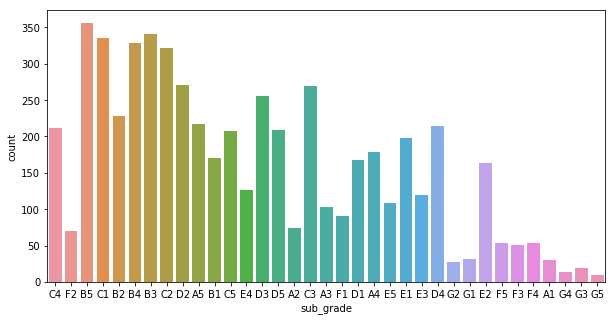

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x="sub_grade",data = chargedoff_loan)
plt.show()

<Figure size 720x360 with 0 Axes>

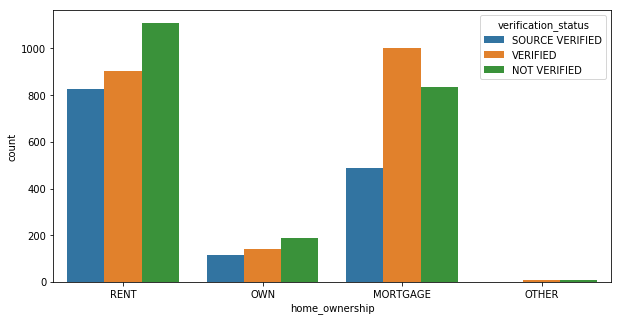

In [36]:
#3.2- ### Analysing the count with respect to verified non verified status of loans when compared to ownership of the house.

plt.figure(figsize=(10,5))
sns.countplot(x="home_ownership",hue = "verification_status" ,data = chargedoff_loan)
plt.show()

<Figure size 720x360 with 0 Axes>

NameError: name 'total' is not defined

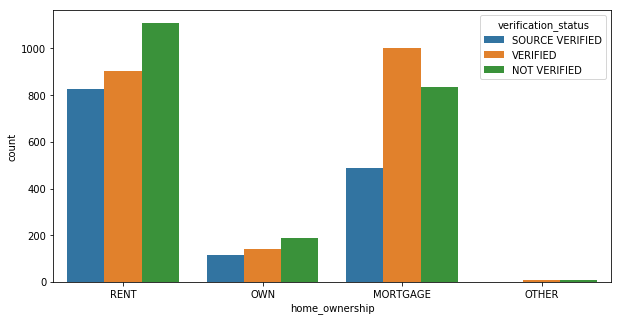

In [37]:
##Naveed Update
plt.figure(figsize=(10,5))
ax = sns.countplot(x="home_ownership",hue = "verification_status",data=chargedoff_loan)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

In [ ]:
### Splitting the annual income of the applicants into specific income zone.

chargedoff_loan = chargedoff_loan.assign(range=pd.cut(loan_filtered['annual_inc'],[0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Least income','Less Income','low_average','average','upper_average','high','higher','upperhigher','highest'] ))

In [ ]:
sns.countplot(x="range",data = chargedoff_loan)
plt.show()


In [ ]:
## Inference : Maximum defaulters in the annual income range of 30000 - 60000.

In [ ]:
## Analysing wrt term of Repayment.

In [ ]:
sns.countplot(x="range",hue = 'term',data = chargedoff_loan)
plt.show()

### Maximum defaulters are in the earning range of 30000 to 60000

In [ ]:
## Inference: In case of 36 months of repayment term.Default is high in all the cases.

In [ ]:
## Importance of verifying the source 

In [ ]:
sns.countplot(x="range",hue = 'verification_status',data = chargedoff_loan)
plt.show()

In [ ]:
## Inference : Verified sources have a lesser default rate.

In [ ]:
## Comparing the state for highest defaulters amongst total applicants and chargedoff applicants.

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="addr_state",data = chargedoff_loan)
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="addr_state",data = loan_filtered)
plt.show()

In [ ]:
## Inference : CA is the highest defaulting state but it also shows that the maximum loan applications are from CA.Probabily we need to find the percentage for all states and analyse.

<Figure size 720x360 with 0 Axes>

Text(-0.24000000000000002, 2848, '50%')

Text(0.76, 452, '8%')

Text(1.76, 2336, '41%')

Text(2.7600000000000002, 27, '0%')

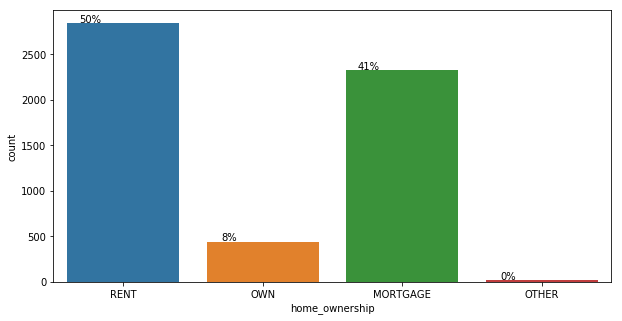

In [44]:
##Naveed Update

total = float(len(chargedoff_loan))

plt.figure(figsize=(10,5))
ax = sns.countplot(x="home_ownership",data=chargedoff_loan)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

<Figure size 720x360 with 0 Axes>

Text(-0.3466666666666667, 836, '15%')

Text(0.6533333333333333, 126, '2%')

Text(1.6533333333333333, 498, '9%')

Text(2.6533333333333333, 10, '0%')

Text(-0.08, 912, '16%')

Text(0.92, 148, '2%')

Text(1.92, 1011, '18%')

Text(2.92, 16, '0%')

Text(0.1866666666666667, 1118, '20%')

Text(1.1866666666666665, 196, '3%')

Text(2.1866666666666665, 845, '15%')

Text(3.1866666666666665, 19, '0%')

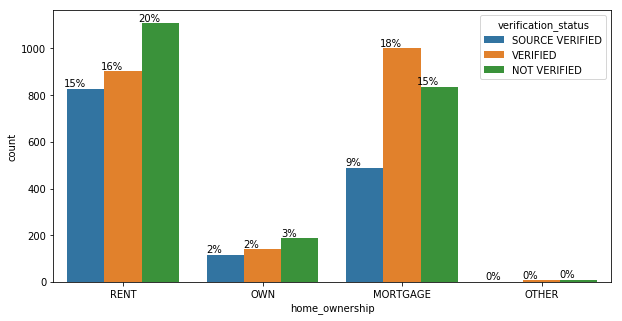

In [45]:
##Naveed Update
plt.figure(figsize=(10,5))
ax = sns.countplot(x="home_ownership",hue = "verification_status",data=chargedoff_loan)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

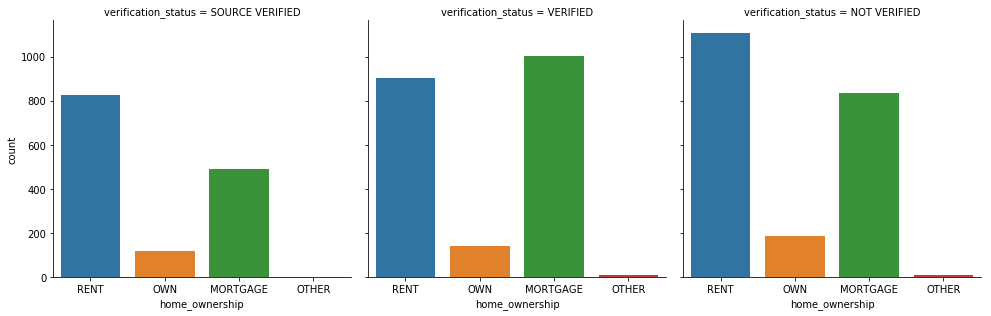

In [46]:
##Naveed Update
sns.catplot("home_ownership",col="verification_status",col_wrap=4,
                  data=chargedoff_loan,
                 kind="count", height=4.5, aspect=1.0)

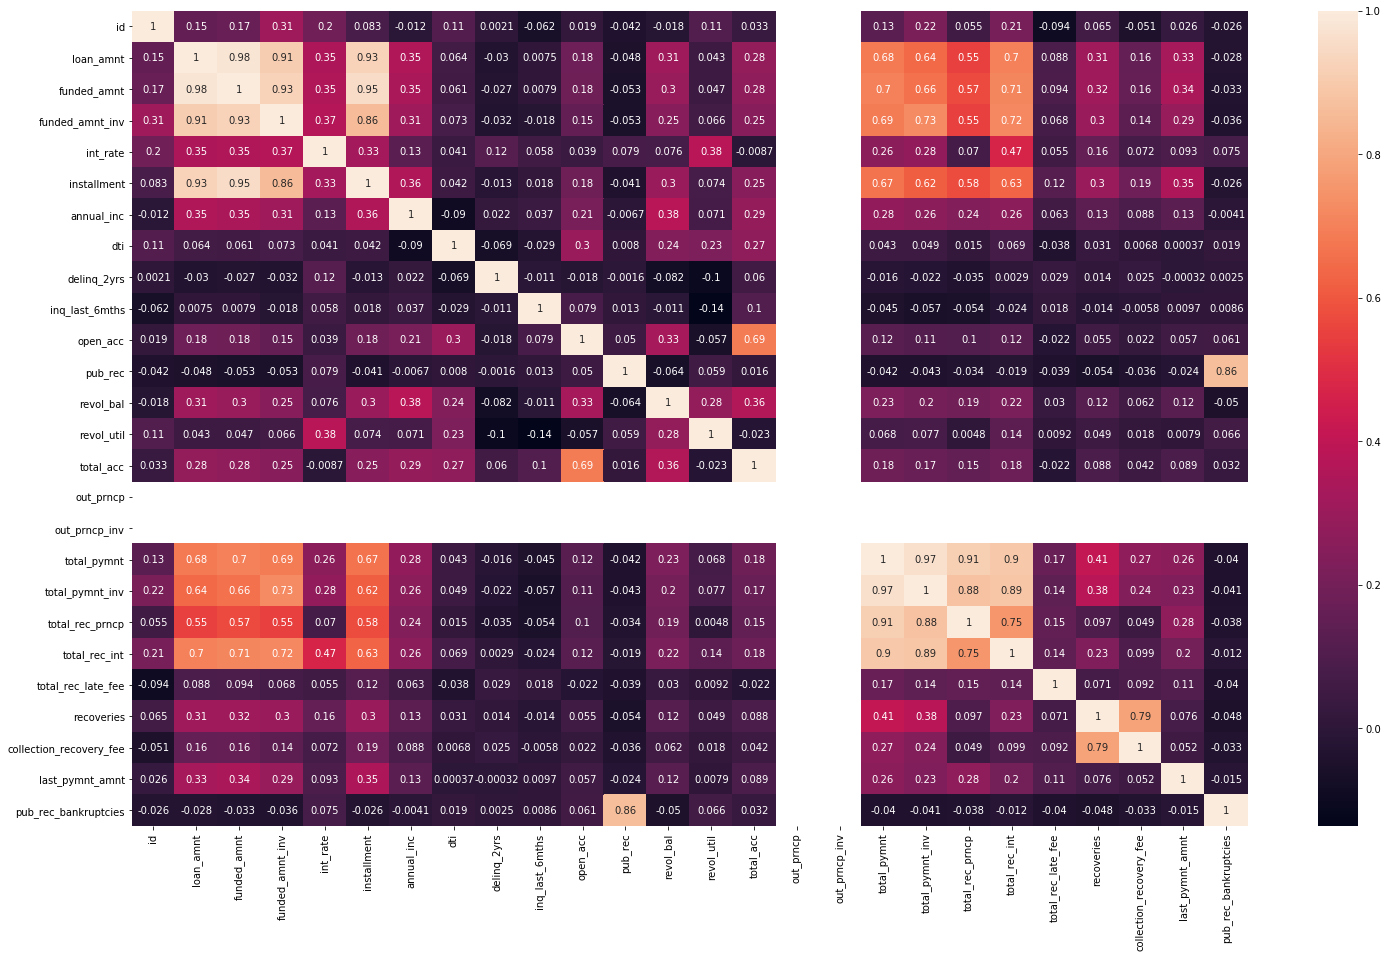

In [40]:
##Naveed Update
plt.figure(figsize=(25, 15))

chargedoff_loan_corr = chargedoff_loan.corr()
sns.heatmap(chargedoff_loan_corr, 
            xticklabels = chargedoff_loan_corr.columns.values,
            yticklabels = chargedoff_loan_corr.columns.values,
            annot = True);

<Figure size 720x360 with 0 Axes>

Text(-0.24000000000000002, 29, '0%')

Text(0.76, 25, '0%')

Text(1.76, 28, '0%')

Text(2.7600000000000002, 14, '0%')

Text(3.7600000000000002, 19, '0%')

Text(4.76, 10, '0%')

Text(5.76, 36, '0%')

Text(6.76, 38, '1%')

Text(7.76, 14, '0%')

Text(8.76, 29, '0%')

Text(9.76, 17, '0%')

Text(10.76, 23, '0%')

Text(11.76, 12, '0%')

Text(12.76, 28, '0%')

Text(13.76, 26, '0%')

Text(14.76, 10, '0%')

Text(15.76, 10, '0%')

Text(16.76, 10, '0%')

Text(17.76, 10, '0%')

Text(18.76, 48, '1%')

Text(19.76, 63, '1%')

Text(20.76, 32, '0%')

Text(21.76, 12, '0%')

Text(22.76, 12, '0%')

Text(23.76, 12, '0%')

Text(24.76, 47, '1%')

Text(25.76, 58, '1%')

Text(26.76, 10, '0%')

Text(27.76, 19, '0%')

Text(28.76, 10, '0%')

Text(29.76, 12, '0%')

Text(30.76, 10, '0%')

Text(31.76, 58, '1%')

Text(32.76, 20, '0%')

Text(33.76, 10, '0%')

Text(34.76, 28, '0%')

Text(35.76, 45, '1%')

Text(36.76, 33, '0%')

Text(37.76, 11, '0%')

Text(38.76, 11, '0%')

Text(39.76, 10, '0%')

Text(40.76, 19, '0%')

Text(41.76, 18, '0%')

Text(42.76, 12, '0%')

Text(43.76, 11, '0%')

Text(44.76, 13, '0%')

Text(45.76, 10, '0%')

Text(46.76, 30, '0%')

Text(47.76, 49, '1%')

Text(48.76, 13, '0%')

Text(49.76, 20, '0%')

Text(50.76, 18, '0%')

Text(51.76, 44, '1%')

Text(52.76, 11, '0%')

Text(53.76, 67, '1%')

Text(54.76, 40, '1%')

Text(55.76, 10, '0%')

Text(56.76, 16, '0%')

Text(57.76, 10, '0%')

Text(58.76, 12, '0%')

Text(59.76, 31, '0%')

Text(60.76, 12, '0%')

Text(61.76, 10, '0%')

Text(62.76, 41, '1%')

Text(63.76, 60, '1%')

Text(64.75999999999999, 32, '0%')

Text(65.75999999999999, 14, '0%')

Text(66.75999999999999, 10, '0%')

Text(67.75999999999999, 12, '0%')

Text(68.75999999999999, 56, '1%')

Text(69.75999999999999, 32, '0%')

Text(70.75999999999999, 55, '1%')

Text(71.75999999999999, 17, '0%')

Text(72.75999999999999, 42, '1%')

Text(73.75999999999999, 35, '0%')

Text(74.75999999999999, 13, '0%')

Text(75.75999999999999, 14, '0%')

Text(76.75999999999999, 12, '0%')

Text(77.75999999999999, 18, '0%')

Text(78.75999999999999, 11, '0%')

Text(79.75999999999999, 104, '2%')

Text(80.75999999999999, 19, '0%')

Text(81.75999999999999, 11, '0%')

Text(82.75999999999999, 45, '1%')

Text(83.75999999999999, 39, '1%')

Text(84.75999999999999, 31, '0%')

Text(85.75999999999999, 12, '0%')

Text(86.75999999999999, 21, '0%')

Text(87.75999999999999, 17, '0%')

Text(88.75999999999999, 15, '0%')

Text(89.75999999999999, 34, '0%')

Text(90.75999999999999, 15, '0%')

Text(91.75999999999999, 28, '0%')

Text(92.75999999999999, 136, '2%')

Text(93.75999999999999, 12, '0%')

Text(94.75999999999999, 22, '0%')

Text(95.75999999999999, 10, '0%')

Text(96.75999999999999, 11, '0%')

Text(97.75999999999999, 17, '0%')

Text(98.75999999999999, 100, '2%')

Text(99.75999999999999, 10, '0%')

Text(100.75999999999999, 14, '0%')

Text(101.75999999999999, 32, '0%')

Text(102.75999999999999, 64, '1%')

Text(103.75999999999999, 28, '0%')

Text(104.75999999999999, 10, '0%')

Text(105.75999999999999, 17, '0%')

Text(106.75999999999999, 85, '1%')

Text(107.75999999999999, 12, '0%')

Text(108.75999999999999, 12, '0%')

Text(109.75999999999999, 14, '0%')

Text(110.75999999999999, 38, '1%')

Text(111.75999999999999, 28, '0%')

Text(112.75999999999999, 10, '0%')

Text(113.75999999999999, 40, '1%')

Text(114.75999999999999, 17, '0%')

Text(115.75999999999999, 12, '0%')

Text(116.75999999999999, 14, '0%')

Text(117.75999999999999, 64, '1%')

Text(118.75999999999999, 13, '0%')

Text(119.75999999999999, 53, '1%')

Text(120.75999999999999, 44, '1%')

Text(121.75999999999999, 10, '0%')

Text(122.75999999999999, 53, '1%')

Text(123.75999999999999, 81, '1%')

Text(124.75999999999999, 33, '0%')

Text(125.75999999999999, 12, '0%')

Text(126.75999999999999, 28, '0%')

Text(127.75999999999999, 33, '0%')

Text(128.76, 17, '0%')

Text(129.76, 25, '0%')

Text(130.76, 78, '1%')

Text(131.76, 10, '0%')

Text(132.76, 43, '1%')

Text(133.76, 35, '0%')

Text(134.76, 10, '0%')

Text(135.76, 32, '0%')

Text(136.76, 28, '0%')

Text(137.76, 46, '1%')

Text(138.76, 16, '0%')

Text(139.76, 13, '0%')

Text(140.76, 29, '0%')

Text(141.76, 11, '0%')

Text(142.76, 42, '1%')

Text(143.76, 22, '0%')

Text(144.76, 32, '0%')

Text(145.76, 136, '2%')

Text(146.76, 14, '0%')

Text(147.76, 26, '0%')

Text(148.76, 46, '1%')

Text(149.76, 12, '0%')

Text(150.76, 28, '0%')

Text(151.76, 11, '0%')

Text(152.76, 27, '0%')

Text(153.76, 33, '0%')

Text(154.76, 10, '0%')

Text(155.76, 28, '0%')

Text(156.76, 12, '0%')

Text(157.76, 26, '0%')

Text(158.76, 11, '0%')

Text(159.76, 55, '1%')

Text(160.76, 65, '1%')

Text(161.76, 10, '0%')

Text(162.76, 16, '0%')

Text(163.76, 29, '0%')

Text(164.76, 35, '0%')

Text(165.76, 10, '0%')

Text(166.76, 30, '0%')

Text(167.76, 31, '0%')

Text(168.76, 83, '1%')

Text(169.76, 10, '0%')

Text(170.76, 21, '0%')

Text(171.76, 10, '0%')

Text(172.76, 21, '0%')

Text(173.76, 32, '0%')

Text(174.76, 10, '0%')

Text(175.76, 23, '0%')

Text(176.76, 29, '0%')

Text(177.76, 24, '0%')

Text(178.76, 11, '0%')

Text(179.76, 50, '1%')

Text(180.76, 10, '0%')

Text(181.76, 22, '0%')

Text(182.76, 20, '0%')

Text(183.76, 50, '1%')

Text(184.76, 19, '0%')

Text(185.76, 26, '0%')

Text(186.76, 10, '0%')

Text(187.76, 45, '1%')

Text(188.76, 11, '0%')

Text(189.76, 40, '1%')

Text(190.76, 11, '0%')

Text(191.76, 21, '0%')

Text(192.76, 28, '0%')

Text(193.76, 54, '1%')

Text(194.76, 51, '1%')

Text(195.76, 10, '0%')

Text(196.76, 61, '1%')

Text(197.76, 32, '0%')

Text(198.76, 26, '0%')

Text(199.76, 31, '0%')

Text(200.76, 12, '0%')

Text(201.76, 10, '0%')

Text(202.76, 24, '0%')

Text(203.76, 51, '1%')

Text(204.76, 38, '1%')

Text(205.76, 47, '1%')

Text(206.76, 18, '0%')

Text(207.76, 21, '0%')

Text(208.76, 44, '1%')

Text(209.76, 42, '1%')

Text(210.76, 68, '1%')

Text(211.76, 26, '0%')

Text(212.76, 43, '1%')

Text(213.76, 17, '0%')

Text(214.76, 12, '0%')

Text(215.76, 11, '0%')

Text(216.76, 10, '0%')

Text(217.76, 42, '1%')

Text(218.76, 53, '1%')

Text(219.76, 10, '0%')

Text(220.76, 17, '0%')

Text(221.76, 47, '1%')

Text(222.76, 54, '1%')

Text(223.76, 70, '1%')

Text(224.76, 10, '0%')

Text(225.76, 13, '0%')

Text(226.76, 14, '0%')

Text(227.76, 19, '0%')

Text(228.76, 80, '1%')

Text(229.76, 40, '1%')

Text(230.76, 66, '1%')

Text(231.76, 13, '0%')

Text(232.76, 10, '0%')

Text(233.76, 15, '0%')

Text(234.76, 18, '0%')

Text(235.76, 34, '0%')

Text(236.76, 10, '0%')

Text(237.76, 31, '0%')

Text(238.76, 11, '0%')

Text(239.76, 63, '1%')

Text(240.76, 13, '0%')

Text(241.76, 16, '0%')

Text(242.76, 10, '0%')

Text(243.76, 68, '1%')

Text(244.76, 28, '0%')

Text(245.76, 38, '1%')

Text(246.76, 50, '1%')

Text(247.76, 15, '0%')

Text(248.76, 16, '0%')

Text(249.76, 22, '0%')

Text(250.76, 10, '0%')

Text(251.76, 27, '0%')

Text(252.76, 49, '1%')

Text(253.76, 10, '0%')

Text(254.76, 11, '0%')

Text(255.76, 13, '0%')

Text(256.76000000000005, 10, '0%')

Text(257.76000000000005, 71, '1%')

Text(258.76000000000005, 19, '0%')

Text(259.76000000000005, 49, '1%')

Text(260.76000000000005, 13, '0%')

Text(261.76000000000005, 10, '0%')

Text(262.76000000000005, 14, '0%')

Text(263.76000000000005, 20, '0%')

Text(264.76000000000005, 49, '1%')

Text(265.76000000000005, 20, '0%')

Text(266.76000000000005, 10, '0%')

Text(267.76000000000005, 37, '0%')

Text(268.76000000000005, 12, '0%')

Text(269.76000000000005, 15, '0%')

Text(270.76000000000005, 45, '1%')

Text(271.76000000000005, 24, '0%')

Text(272.76000000000005, 11, '0%')

Text(273.76000000000005, 10, '0%')

Text(274.76000000000005, 38, '1%')

Text(275.76000000000005, 17, '0%')

Text(276.76000000000005, 10, '0%')

Text(277.76000000000005, 17, '0%')

Text(278.76000000000005, 37, '0%')

Text(279.76000000000005, 12, '0%')

Text(280.76000000000005, 12, '0%')

Text(281.76000000000005, 37, '0%')

Text(282.76000000000005, 20, '0%')

Text(283.76000000000005, 13, '0%')

Text(284.76000000000005, 10, '0%')

Text(285.76000000000005, 41, '1%')

Text(286.76000000000005, 13, '0%')

Text(287.76000000000005, 17, '0%')

Text(288.76000000000005, 12, '0%')

Text(289.76000000000005, 10, '0%')

Text(290.76000000000005, 10, '0%')

Text(291.76000000000005, 31, '0%')

Text(292.76000000000005, 40, '1%')

Text(293.76000000000005, 10, '0%')

Text(294.76000000000005, 17, '0%')

Text(295.76000000000005, 10, '0%')

Text(296.76000000000005, 11, '0%')

Text(297.76000000000005, 24, '0%')

Text(298.76000000000005, 10, '0%')

Text(299.76000000000005, 11, '0%')

Text(300.76000000000005, 11, '0%')

Text(301.76000000000005, 10, '0%')

Text(302.76000000000005, 38, '1%')

Text(303.76000000000005, 15, '0%')

Text(304.76000000000005, 18, '0%')

Text(305.76000000000005, 10, '0%')

Text(306.76000000000005, 10, '0%')

Text(307.76000000000005, 12, '0%')

Text(308.76000000000005, 10, '0%')

Text(309.76000000000005, 28, '0%')

Text(310.76000000000005, 25, '0%')

Text(311.76000000000005, 11, '0%')

Text(312.76000000000005, 11, '0%')

Text(313.76000000000005, 23, '0%')

Text(314.76000000000005, 27, '0%')

Text(315.76000000000005, 10, '0%')

Text(316.76000000000005, 22, '0%')

Text(317.76000000000005, 18, '0%')

Text(318.76000000000005, 21, '0%')

Text(319.76000000000005, 16, '0%')

Text(320.76000000000005, 10, '0%')

Text(321.76000000000005, 18, '0%')

Text(322.76000000000005, 13, '0%')

Text(323.76000000000005, 10, '0%')

Text(324.76000000000005, 14, '0%')

Text(325.76000000000005, 10, '0%')

Text(326.76000000000005, 13, '0%')

Text(327.76000000000005, 10, '0%')

Text(328.76000000000005, 11, '0%')

Text(329.76000000000005, 10, '0%')

Text(330.76000000000005, 10, '0%')

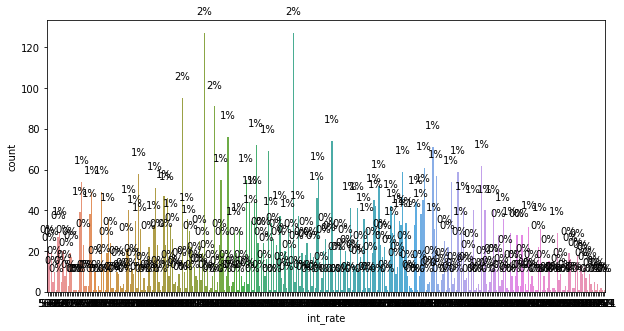

In [47]:
##Naveed Update
plt.figure(figsize=(10,5))
ax = sns.countplot(x="int_rate",data=chargedoff_loan)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

### With just int_rate value as such its not helpful..so we need to create a new column 'int_category' based on int_rate , have classified as 5-10 as 'Low', 10-18 as 'Medium'and more than 18 as 'High'

In [51]:
## Naveed Update

### Creting a new dataframe with time slots
chargedoff_loan_int = chargedoff_loan.assign( 
    int_category = pd.cut(
        chargedoff_loan.int_rate,
        [-1, 10, 18, 25],
        labels=['Low', 'Medium', 'High']))

In [52]:
chargedoff_loan_int.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_category
1,1077430,2500,2500,"2,500.00",60 MONTHS,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,"30,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,Medium
8,1071795,5600,5600,"5,600.00",60 MONTHS,21.28,152.39,F,F2,NaN,4 YEARS,OWN,"40,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,SMALL_BUSINESS,958XX,CA,5.55,0,2004-04-01,2,11,0,5210,32.60,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,2012-08-01,0.00,High
9,1071570,5375,5375,"5,350.00",60 MONTHS,12.69,121.45,B,B5,STARBUCKS,< 1 YEAR,RENT,"15,000.00",VERIFIED,2011-12-01,CHARGED OFF,OTHER,774XX,TX,18.08,0,2004-09-01,0,2,0,9279,36.50,3,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,0.00,Medium
12,1064687,9000,9000,"9,000.00",36 MONTHS,13.49,305.38,C,C1,VA. DEPT OF CONSERVATION/RECREATION,< 1 YEAR,RENT,"30,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,DEBT_CONSOLIDATION,245XX,VA,10.08,0,2004-04-01,1,4,0,10452,91.70,9,0.00,0.00,"2,270.70","2,270.70","1,256.14",570.26,0.00,444.30,4.16,2012-07-01,305.38,2012-11-01,0.00,Medium
14,1069057,10000,10000,"10,000.00",36 MONTHS,10.65,325.74,B,B2,SFMTA,3 YEARS,RENT,"100,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,OTHER,951XX,CA,7.06,0,1991-05-01,2,14,0,11997,55.50,29,0.00,0.00,"7,471.99","7,471.99","5,433.47","1,393.42",0.00,645.10,6.31,2013-10-01,325.74,2014-03-01,0.00,Medium


<Figure size 720x360 with 0 Axes>

Text(-0.24000000000000002, 839, '15%')

Text(0.76, 4070, '72%')

Text(1.76, 745, '13%')

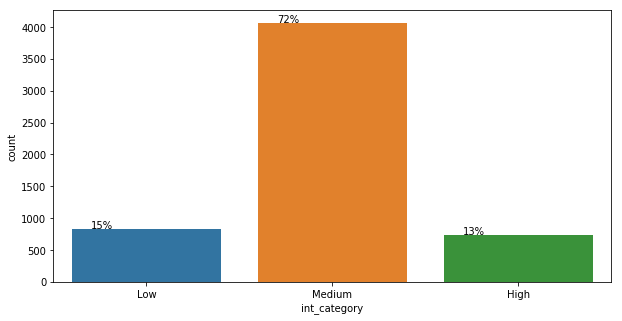

In [54]:
##Naveed Update

total = float(len(chargedoff_loan_int))

plt.figure(figsize=(10,5))
ax = sns.countplot(x="int_category",data=chargedoff_loan_int)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

### Inference from above clearly shows that 72% of Defaulters belong to consumer who have taken loans on Medium Interest rate i.e. 10 - 18

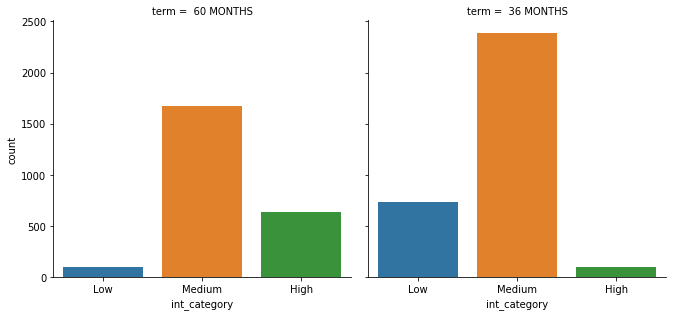

In [55]:
##Naveed Update
sns.catplot("int_category",col="term",col_wrap=4,
                  data=chargedoff_loan_int,
                 kind="count", height=4.5, aspect=1.0)

<Figure size 720x360 with 0 Axes>

Text(-0.32, 103, '2%')

Text(0.68, 1679, '30%')

Text(1.6800000000000002, 645, '11%')

Text(0.08, 745, '13%')

Text(1.08, 2400, '42%')

Text(2.08, 109, '2%')

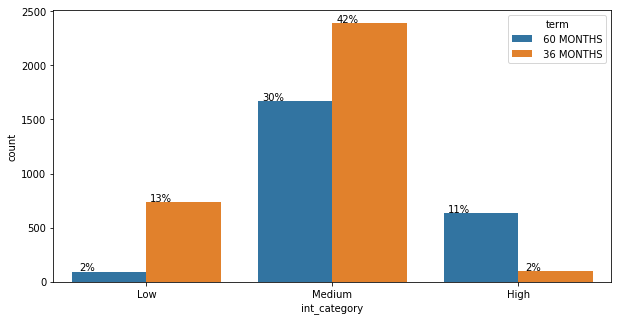

In [56]:
##Naveed Update
plt.figure(figsize=(10,5))
ax = sns.countplot(x="int_category",hue = "term",data=chargedoff_loan_int)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

### Inference from above -  The Defaulters have mainly Medium Interest loan borrowers , out ot 72%  42% have taken loan term as 36 months and 30% have taken loan term as 60 months..